In [107]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
from sklearn.preprocessing import LabelEncoder 
category = LabelEncoder()
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

In [78]:
data.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male
6,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,+2,56,Every three months,Female
7,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,I love it!+5,23,Once a week,Female
8,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,58,Once a year,Male
9,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,+1,32,Every three months,Female


In [79]:
data.shape

(1453, 15)

In [80]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [81]:
categorical = ['yummy','convenient','spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Gender','VisitFrequency']
data[categorical] = data[categorical].apply(category.fit_transform)
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,0,1


In [82]:
df_scaled = data.copy()
  
# apply normalization technique to Age
column = 'Age'
df_scaled[column] = (df_scaled[column] - df_scaled[column].mean()) / df_scaled[column].std()    
  
df_scaled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,1.152861,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,0.449685,0,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,1.223179,0,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,1.715403,4,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,0.309049,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,0.168414,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,-0.605080,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,0.520002,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,-0.253492,0,1


In [83]:
like_columns = {'I love it!+5':5,'I hate it!-5':-5,'-4':4,'-3':-3,'-2':-2,'-1':-1,'0':0,'+1':1,'+2':2,'+3':3,'+4':4}
df_scaled['Like'] = df_scaled.Like.map(like_columns)
data['Like'] = data.Like.map(like_columns)
df_scaled

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,1.152861,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,0.449685,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,1.223179,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,1.715403,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,0.309049,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,0.168414,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,-0.605080,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,0.520002,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,-0.253492,0,1


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_scaled_data = scaler.fit_transform(df_scaled)
new_scaled_data

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.15325815,
        -1.5027412 , -0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.44983942,
        -1.5027412 , -0.918645  ],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.22360002,
        -1.5027412 , -0.918645  ],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.5201813 ,
         0.20622016, -0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.2535793 ,
        -1.5027412 ,  1.08855979],
       [-1.11147857,  0.31873518, -0.32134871, ..., -1.0273399 ,
        -1.5027412 ,  1.08855979]])

In [85]:
from sklearn.cluster import KMeans
wcss = [] 
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0) 
   
    kmeans.fit(new_scaled_data)
    wcss.append(kmeans.inertia_) 

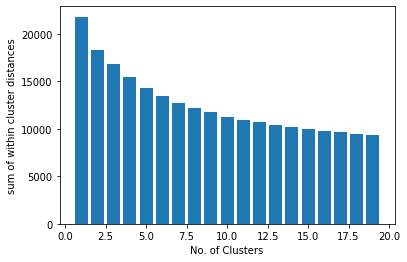

<Figure size 3240x1080 with 0 Axes>

In [106]:
plt.bar(range(1,20),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("sum of within cluster distances")
plt.figure(figsize=(45,15))
plt.show()

In [89]:
kmeans = KMeans(9)
kmeans.fit(new_scaled_data)

KMeans(n_clusters=9)

In [90]:
kmeans.cluster_centers_

array([[-0.04303865,  0.21073093, -0.07100881,  0.05375918,  0.13469546,
        -3.0034463 , -0.79654901, -0.14885919,  0.68760076, -0.05465191,
        -0.03212909, -0.13971593, -0.07552644, -0.09047452,  0.10586578],
       [ 0.74424885,  0.26864625, -0.32134871,  0.39137527,  0.94833876,
         0.33295085,  0.65105323,  0.6826599 , -0.60546836, -0.09890114,
        -0.32993407,  0.50749701, -0.75990486,  0.04110312, -0.18170025],
       [-0.01610319,  0.22616011,  3.11188424,  0.15460554,  0.26881249,
         0.30316159,  0.08996436,  0.23966956,  0.16609017,  0.19512123,
         0.0997258 , -0.03524534,  0.41152822, -0.04300337,  0.15664328],
       [ 0.6026926 ,  0.27498662, -0.32134871,  0.39137527, -1.05447551,
         0.33295085,  0.60339503,  0.69913677, -0.71134589,  0.11480499,
        -0.53697257,  0.48128897, -0.00426634, -0.06779052, -0.19029221],
       [-1.09319511, -3.13740077, -0.16529267,  0.01637029,  0.45673889,
        -0.91061536, -0.55388943, -1.19362005, 

In [91]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_,columns=[df_scaled.columns])

In [92]:
labels = kmeans.labels_
labels

array([6, 1, 2, ..., 8, 7, 0], dtype=int32)

In [93]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [94]:
df_centroid = pd.concat([data,pd.DataFrame({'centroid':labels})], axis = 1)
df_centroid

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,centroid
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,6
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1,0
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0,8
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,1,7


In [95]:
df_centroid['segments'] = df_centroid['centroid']

In [98]:
df_centroid['segments'] = df_centroid['segments'].replace([0,1,2,3,4,5,6,7,8],['Segment 0', 'Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7', 'Segment 8'])

In [99]:
df_centroid.head(10)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,centroid,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,6,Segment 6
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0,1,Segment 1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0,2,Segment 2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,1,Segment 1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,6,Segment 6
5,1,1,0,1,0,1,1,1,0,0,0,2,55,0,1,3,Segment 3
6,1,1,1,1,0,1,0,1,1,1,0,2,56,0,0,2,Segment 2
7,1,1,0,1,1,1,1,1,0,0,0,5,23,4,0,1,Segment 1
8,0,0,0,1,1,0,0,0,1,0,1,-5,58,5,1,4,Segment 4
9,1,1,0,1,1,1,0,1,1,0,0,1,32,0,0,8,Segment 8


In [100]:
df_centroid.pop('centroid')
df_centroid

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,segments
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0,Segment 6
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0,Segment 1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0,Segment 2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0,Segment 1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1,Segment 6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1,Segment 0
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0,Segment 0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0,Segment 8
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,1,Segment 7


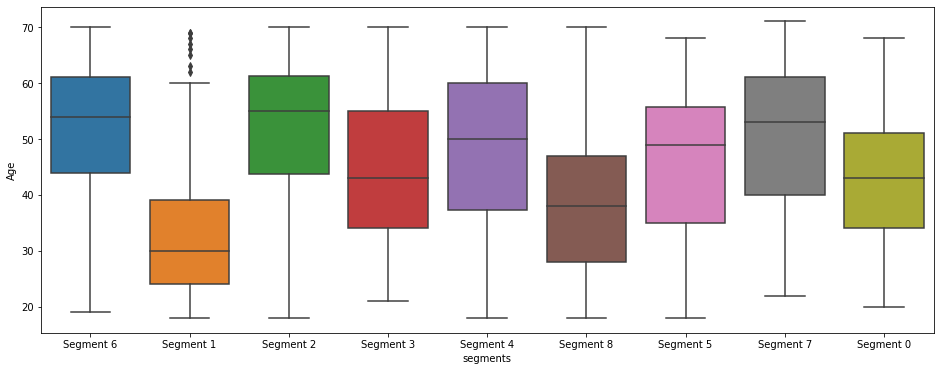

In [108]:
plt.figure(figsize=(16,6))
sns.boxplot(x='segments',y='Age',data=df_centroid)